## 简洁版MLP

In [1]:
import torch
from torch import nn
from d2l import torch as d2l
# from torchmetrics import Accuracy

In [15]:
num_inputs, num_outputs, num_hiddens = 784, 10, 256

net = nn.Sequential(nn.Flatten(),
                    nn.Linear(num_inputs, num_hiddens),
                    nn.ReLU(),
                    nn.Linear(num_hiddens, num_outputs))

# accuracy = Accuracy(num_classes=10, task='multiclass')

In [16]:
def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)

net.apply(init_weights)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=256, bias=True)
  (2): ReLU()
  (3): Linear(in_features=256, out_features=10, bias=True)
)

In [17]:
def accuracy(y_hat, y):
    y_hat = y_hat.argmax(axis = 1)
    cmp = (y_hat.type(y.dtype) == y)
    return cmp.sum()

In [18]:
def train_epoch(net, train_iter, loss, updater):
    sum_loss = 0
    num_right = 0
    tot_num = 0
    
    net.train()
    for X, y in train_iter:
        y_hat = net(X)
        l = loss(y_hat, y)
        updater.zero_grad()
        l.backward()
        updater.step()
        sum_loss += float(l)
        num_right += accuracy(y_hat, y)
        tot_num += len(X)
    return sum_loss / tot_num, num_right / tot_num

In [19]:
def train(net, train_iter, loss, updater):
    for epoch in range(num_epochs):
        train_loss, train_acc = train_epoch(net,train_iter,loss,updater)
        print(f'Epoch {epoch+1} / {num_epochs}: '
              f'train loss : {train_loss}, train_accuracy: {train_acc}')

In [20]:
batch_size, lr, num_epochs = 256, 0.1, 10
loss = nn.CrossEntropyLoss()
updater = torch.optim.SGD(net.parameters(), lr=lr)

In [21]:
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
train(net, train_iter, loss, updater)

Epoch 1 / 10: train loss : 0.00408826510310173, train_accuracy: 0.6391000151634216
Epoch 2 / 10: train loss : 0.0023443221266071, train_accuracy: 0.7902833223342896
Epoch 3 / 10: train loss : 0.0020236638739705086, train_accuracy: 0.8183000087738037
Epoch 4 / 10: train loss : 0.0018800207530458768, train_accuracy: 0.8320666551589966
Epoch 5 / 10: train loss : 0.0017729996467630068, train_accuracy: 0.8408833146095276
Epoch 6 / 10: train loss : 0.0016980987767378488, train_accuracy: 0.846750020980835
Epoch 7 / 10: train loss : 0.0016284942229588826, train_accuracy: 0.8541333079338074
Epoch 8 / 10: train loss : 0.0015747995259861151, train_accuracy: 0.857366681098938
Epoch 9 / 10: train loss : 0.0015344713012377421, train_accuracy: 0.8618166446685791
Epoch 10 / 10: train loss : 0.0014896476204196612, train_accuracy: 0.8654999732971191


In [10]:
def predict_ch3(net, test_iter, n=6): 
    for X, y in test_iter:
        break
    trues = d2l.get_fashion_mnist_labels(y)
    preds = d2l.get_fashion_mnist_labels(net(X).argmax(axis=1))
    titles = [true +'\n' + pred for true, pred in zip(trues, preds)]
    d2l.show_images(
        X[0:n].reshape((n, 28, 28)), 1, n, titles=titles[0:n])

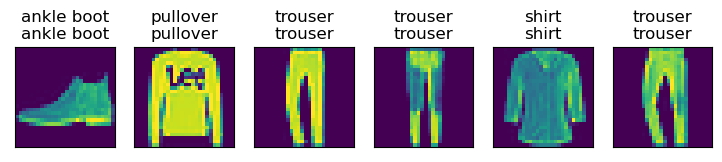

In [11]:
predict_ch3(net, test_iter)